In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               6
Dependents           15
Education             9
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     21
Credit_History       50
Property_Area         9
Loan_Status           0
dtype: int64

We are taking "ApplicantIncome" to apply scaling. First we need to fill the missing data

In [ ]:
dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].mean(), inplace=True)

C:\Users\tanay\AppData\Local\Temp\ipykernel_5016\2914172478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].mean(), inplace=True)


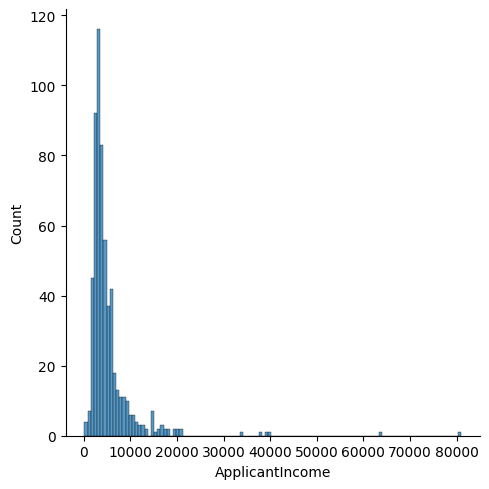

In [5]:
sns.displot(dataset["ApplicantIncome"])
plt.show()

In [6]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,583.000000,598.000000,598.000000,576.000000,577.000000,548.000000
mean,0.754717,5291.788591,1631.499866,144.895833,342.218371,0.843066
std,1.005077,5807.216298,2953.315785,82.757474,64.319629,0.364071
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,126.500000,360.000000,1.000000
75%,1.500000,5741.000000,2324.000000,166.250000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


Now we gonna use scikit-learn to do scaling of Application income

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

,copy,True
,with_mean,True
,with_std,True


In [9]:
dataset["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]), columns=["x"]) # transform returns a numpy array and we are converting it to a DataFrame as a column "x" by using pandas DataFrame constructor

In [10]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,0.096032
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,-0.122155
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,-0.394975


In [11]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,583.000000,598.000000,598.000000,576.000000,577.000000,548.000000,5.980000e+02
mean,0.754717,5291.788591,1631.499866,144.895833,342.218371,0.843066,6.535092e-17
std,1.005077,5807.216298,2953.315785,82.757474,64.319629,0.364071,1.000837e+00
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,-8.861549e-01
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,-4.160874e-01
50%,0.000000,3806.000000,1211.500000,126.500000,360.000000,1.000000,-2.560663e-01
75%,1.500000,5741.000000,2324.000000,166.250000,360.000000,1.000000,7.741876e-02
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,1.304783e+01


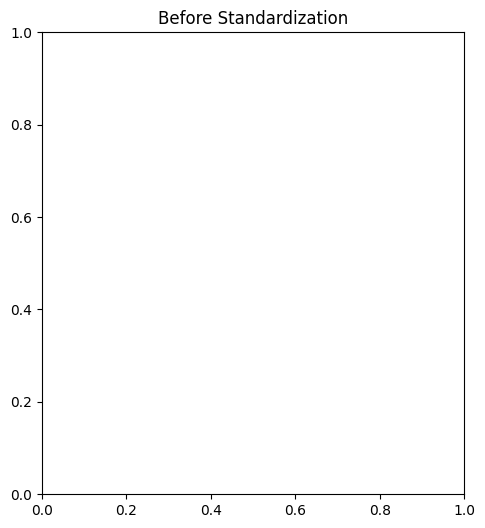

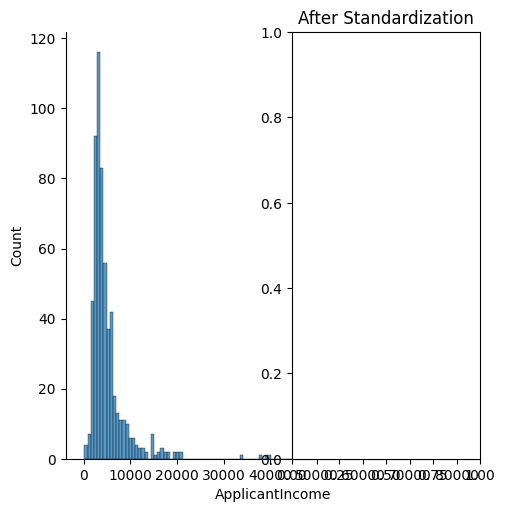

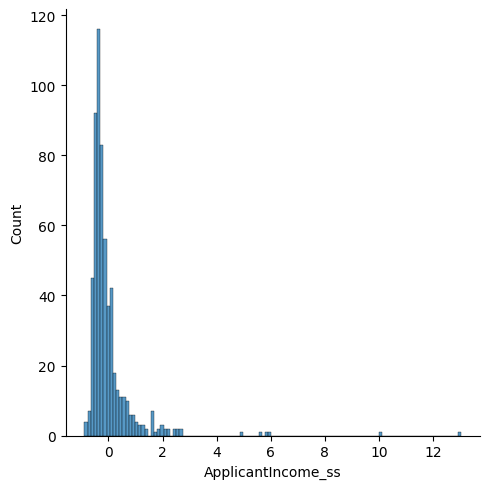

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Before Standardization")
sns.displot(dataset["ApplicantIncome"])

plt.subplot(1, 2, 2)
plt.title("After Standardization")
sns.displot(dataset["ApplicantIncome_ss"])

plt.show()

CONCLUSION: SCALING ONLY REDUCES THE MAGNITUDE OF THE DATA BUT THE NATURE OF THE DATA REMAINS THE SAME